In [1]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

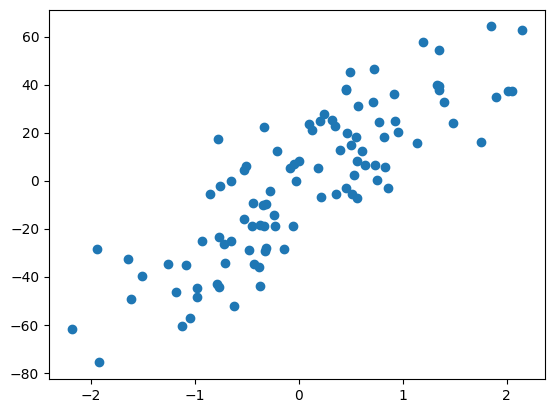

In [3]:
plt.scatter(x,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model=LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
model1=Ridge(alpha=10)
model1.fit(x,y)
print(model1.coef_)
print(model1.intercept_)


[24.9546267]
-2.1269130035235735


In [8]:
model2=Ridge(alpha=100)
model2.fit(x,y)
print(model2.coef_)
print(model2.intercept_)

[12.93442104]
-1.4248441496033308


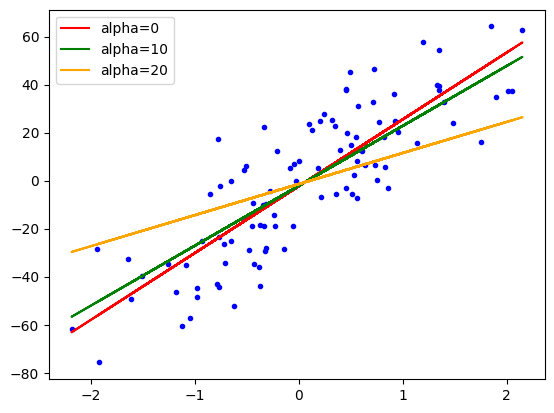

In [9]:
plt.plot(x,y,'b.')
plt.plot(x,model.predict(x),color='r',label='alpha=0')
plt.plot(x,model1.predict(x),color='g',label='alpha=10')
plt.plot(x,model2.predict(x),color='orange',label='alpha=20')
plt.legend()

In [10]:
class ridge:

    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):
            num=num + (y_train[i] -y_train.mean())*(x_train[i] - x_train.mean())
            den=den + (x_train[i] -x_train.mean())*(x_train[i] - x_train.mean()) 
        den=den + (x_train[i] -x_train.mean())*(x_train[i] - x_train.mean()) + self.alpha
        self.m= num/den 
        self.b=y_train.mean() - (self.m * x_train.mean())
        print(self.m,self.b)
    
    def predict(self,x_test):
        pass
    

In [11]:
obj= ridge(10)
obj.fit(x,y)

[24.7842812] [-2.11696357]


For N Dimensional Data

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [13]:
X,y = load_diabetes(return_X_y=True)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [15]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)
Ridge(alpha=0.1, solver='cholesky')
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [16]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [17]:
class R:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_=None
        self.intercept_= None 
    
    def fit(self,x_train,y_train):
        x_train1=np.insert(x_train,0,1,axis=1)# ye func x_train ke ander 0th column mein
                                             # 1 insert krdega 
        I= np.identity(x_train1.shape[1])
        result= np.linalg.inv(np.dot(x_train1.T,x_train1)+ self.alpha * I).dot(x_train1.T).dot(y_train)
        self.intercept_=result[0]
        self.coef_ = result[1:]
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [20]:
reg= R()

In [21]:
reg.fit(X_train,y_train)

In [22]:
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023164
